# Latar Belakang



# Pernyataan Masalah

# Tujuan Analisis

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, f_oneway
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

In [220]:
df=pd.read_csv('Supermarket Customers.csv', sep='\t')
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


# Informasi Dataset

In [221]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

## Data Preprocessing


# Missing Values

Menampilkan kolom yang memiliki missing values

In [222]:
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Menghapus baris dengan missing values

In [223]:
df = df.dropna()
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


# Data Duplikat

Menampilkan data duplikat

In [224]:
df.duplicated().sum()

0

Menampilkan nilai unique dari setiap kolom

In [225]:
pd.set_option('display.max_colwidth', 3)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2216,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 2139, 1371, 9909, 7286, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 11178, 2230, 7516, 7247, 11100, 4646, 3037, 1473, 1016, 4518, 9370, 8908, 8373, 7533, 2683, 3629, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1983, 1945, 1991, 1962, 1953, 1956, 1992, 1961, 1900, 1986, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, 68126.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,662,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 20-02-2013, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, 12-12-2012, 10-09-2013, 24-01-2014, 19-02-2013, 11-07-2013, 14-11-2013, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 40, 9, 87, 5, 95, 48, 70, 79, 84, 44, 43, 35, 15, 17, 46, 27, 25, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 80, 45, 14, 52, 93, 50, 60, 11, 66, 97, 62, 6, 33, 22, 71, 67, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 123, 826, 245, 650, 12, 510, 328, 984,

# Data Formating

Dikarenakan kolom Dt_Customer memuat nilai tanggal, kolom tersebut diubah tipe datanya menjadi datetime dan formatnya disesuaikan.

In [227]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

Dari hasil kode di atas, pada kolom Education, terdapat nilai 2n Cycle. Namun, 2n Cycle pada kolom tersebut setara dengan Master, sehingga nilai 2n Cycle disatukan dengan Master. Berikutnya, nilai Alone, YOLO, Absurd, dan Together dikategorikan sebagai Single, sedangkan Divorced dan Widow dikategorikan sebagai Married.

In [226]:
df['Marital_Status'] = df['Marital_Status'].replace('Alone', 'Single')
df['Marital_Status'] = df['Marital_Status'].replace('YOLO', 'Single')
df['Marital_Status'] = df['Marital_Status'].replace('Absurd', 'Single')
df['Marital_Status'] = df['Marital_Status'].replace('Together', 'Single')
df['Marital_Status'] = df['Marital_Status'].replace('Divorced', 'Married')
df['Marital_Status'] = df['Marital_Status'].replace('Widow', 'Married')
df['Education'] = df['Education'].replace('2n Cycle', 'Master')

Kolom usia atau Age dibuat dengan mengurangi tahun sekarang dengan tahun kelahiran customer.

In [228]:
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

Usia dikelompokkan menjadi 4 kategori sebagai berikut

In [229]:
def category(age):
  if 28 <= age <= 40:
    return 'Category 1'
  elif 41 <= age <= 50:
    return 'Category 2'
  elif 51 <= age <= 60:
    return 'Category 3'
  elif age > 60:
    return 'Category 4'

df['Age_Category'] = df['Age'].apply(category)

min_cat1 = df[df['Age_Category'] == 'Category 1']['Age'].min()
max_cat1 = df[df['Age_Category'] == 'Category 1']['Age'].max()
min_cat2 = df[df['Age_Category'] == 'Category 2']['Age'].min()
max_cat2 = df[df['Age_Category'] == 'Category 2']['Age'].max()
min_cat3 = df[df['Age_Category'] == 'Category 3']['Age'].min()
max_cat3 = df[df['Age_Category'] == 'Category 3']['Age'].max()

print('Category 1: ', min_cat1, '-', max_cat1)
print('Category 2: ', min_cat2, '-', max_cat2)
print('Category 3: ', min_cat3, '-', max_cat3)
print('Category 4: ', f'di atas {max_cat3}')

Category 1:  28 - 40
Category 2:  41 - 50
Category 3:  51 - 60
Category 4:  di atas 60


Kolom Total_Spending dibuat untuk mengetahui jumlah produk yang dibeli oleh customer

In [230]:
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[product_cols].sum(axis=1)

# Statistika Deskriptif

In [231]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
ID,2216.0,5588.353339,0.0,2814.75,5458.5,8421.75,11191.0,3249.376275
Year_Birth,2216.0,1968.820397,1893.0,1959.0,1970.0,1977.0,1996.0,11.985554
Income,2216.0,52247.251354,1730.0,35303.0,51381.5,68522.0,666666.0,25173.076661
Kidhome,2216.0,0.441787,0.0,0.0,0.0,1.0,2.0,0.536896
Teenhome,2216.0,0.505415,0.0,0.0,0.0,1.0,2.0,0.544181
Dt_Customer,2216,2013-07-10 11:29:27.509025280,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-31 00:00:00,2014-06-29 00:00:00,NaN
Recency,2216.0,49.012635,0.0,24.0,49.0,74.0,99.0,28.948352
MntWines,2216.0,305.091606,0.0,24.0,174.5,505.0,1493.0,337.32792
MntFruits,2216.0,26.356047,0.0,2.0,8.0,33.0,199.0,39.793917
MntMeatProducts,2216.0,166.995939,0.0,16.0,68.0,232.25,1725.0,224.283273


# Outlier

Memeriksa nilai outlier dari kolom income

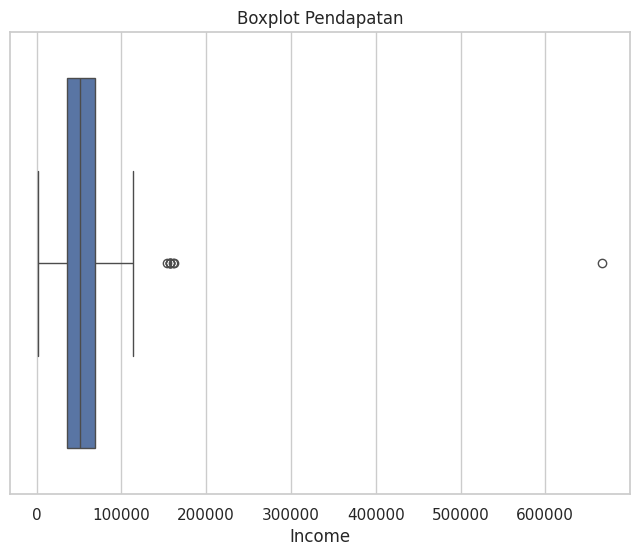

In [232]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Income'])
plt.title('Boxplot Pendapatan')
plt.show()

In [233]:
def Cek_Outliers(df, col):
    Q1 = df[col].describe()['25%']
    Q3 = df[col].describe()['75%']
    IQR = Q3 - Q1
    Upper_Fence = Q3 + (1.5 * IQR)
    Lower_Fence = Q1 - (1.5 * IQR)
    df_outliers = df[(df[col] < Lower_Fence) | (df[col] > Upper_Fence)]
    if len(df_outliers) == 0:
        return "No Outliers"
    else:
        return df_outliers[col]

Cek_Outliers(df, 'Income')

,Income
164,157243.0
617,162397.0
655,153924.0
687,160803.0
1300,157733.0
1653,157146.0
2132,156924.0
2233,666666.0


Menghapus nilai Income yang merupakan outlier

In [234]:
df = df.drop(df[df['Income'] > 150000].index)

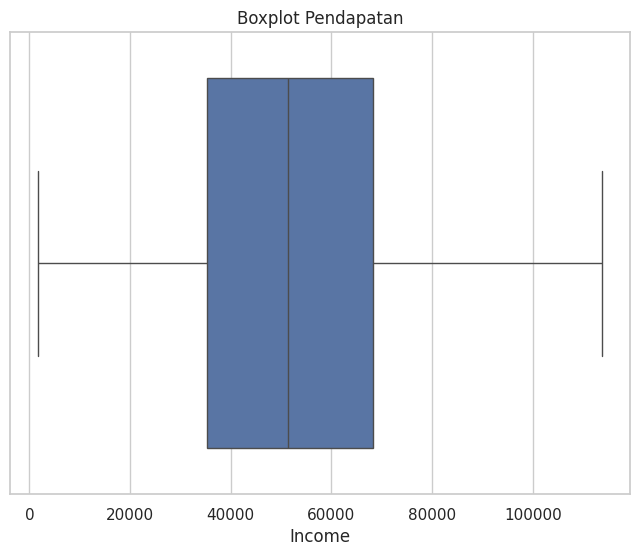

In [235]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Income'])
plt.title('Boxplot Pendapatan')
plt.show()


# Analisis Data

# Setting

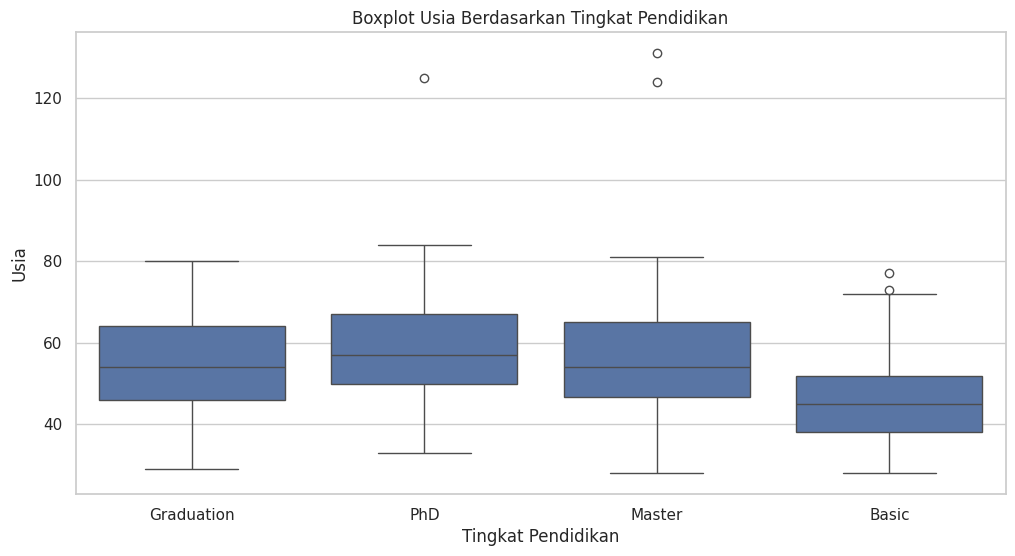

In [236]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Education', y='Age', data=df)
plt.title('Boxplot Usia Berdasarkan Tingkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Usia')
plt.show()

In [237]:
df['Education'].value_counts()

,count
Education,
Graduation,1113
Master,564
PhD,477
Basic,54


In [238]:
average_income_by_education = df.groupby('Education')['Income'].mean().reset_index()
average_income_by_education = average_income_by_education.rename(columns={'Income': 'Average Income'})

average_income_by_education

,Education,Average Income
0,Basic,20306.259259
1,Graduation,51984.008086
2,Master,50857.810284
3,PhD,55279.935010


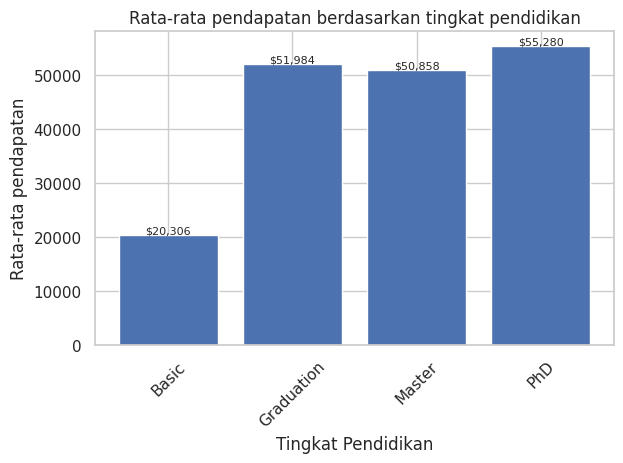

In [239]:
# Membuat sebuah diagram batang dari rata-rata pendapatan dari tingkat pendidikan
ax = plt.bar(average_income_by_education['Education'], average_income_by_education['Average Income'])

# Memberi label
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Rata-rata pendapatan')
plt.title('Rata-rata pendapatan berdasarkan tingkat pendidikan')

# Menambahkan nomor berada di atas setiap bar
for i, v in enumerate(average_income_by_education['Average Income']):
    plt.text(i, v, f'${v:,.0f}',  # Format sebagai currency tanpa angka desimal
             ha='center',          # Horizontal alignment
             va='bottom',          # Vertical alignment
             fontsize=8)           # ukuran font

# Putar sumbu X agar mudah dibaca
plt.xticks(rotation=45)

# Sesuaikan layout untuk mencegah label terpotong
plt.tight_layout()

# Display the plot
plt.show()

In [240]:
average_income_by_age = df.groupby('Age_Category')['Income'].mean().reset_index()
average_income_by_age = average_income_by_age.rename(columns={'Income': 'Average Income'})

average_income_by_age

,Age_Category,Average Income
0,Category 1,45236.007782
1,Category 2,47959.860104
2,Category 3,51109.403756
3,Category 4,57235.676671


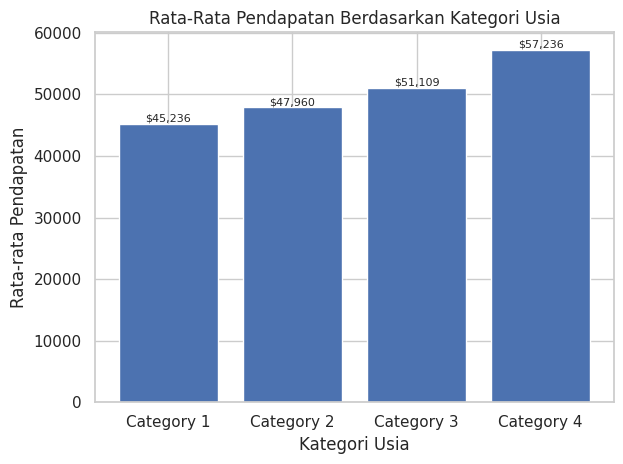

In [241]:
# Membuat diagram batang dari rata-rata pendapatan berdasarkan kategori usia
ax = plt.bar(average_income_by_age['Age_Category'], average_income_by_age['Average Income'])

# Add labels and title
plt.xlabel('Kategori Usia')
plt.ylabel('Rata-rata Pendapatan')
plt.title('Rata-Rata Pendapatan Berdasarkan Kategori Usia')

# Add numbers on top of each bar
for i, v in enumerate(average_income_by_age['Average Income']):
    plt.text(i, v, f'${v:,.0f}',  # Format sebagai currency tanpa desimal
             ha='center',
             va='bottom',
             fontsize=8)           # Ukuran font


# Sesuaikan Layout untuk mencegah label terpotong
plt.tight_layout()
plt.show()

In [242]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df['Total_Responses'] = df[campaign_cols].sum(axis=1)

# Hitung rata-rata respon terhadap kampanye
overall_response_rate = df[campaign_cols].mean().mean()
print("Overall Campaign Response Rate: {:.2%}".format(overall_response_rate))

# Responden kampanye tinggi rendah
high_responders = df[df['Total_Responses'] > 1]
low_responders = df[df['Total_Responses'] == 0]

print(f"High Responders: {len(high_responders)} customers")
print(f"Low Responders: {len(low_responders)} customers")

Overall Campaign Response Rate: 7.50%
High Responders: 236 customers
Low Responders: 1603 customers


Dari hasil di atas, hanya 7,48% customer yang menerima tawaran dari 6 kampanye yang telah dibuat oleh perusahaan dengan perbandingan 236:1610 antara yang menerima dengan yang tidak.

In [243]:
# Rata-rata pembelian berdasarkan kategori produk
avg_spending_by_category = df[product_cols].mean()
print("Rata-Rata Pembelian Berdasarkan Kategori Produk:\n", avg_spending_by_category)

Rata-Rata Pembelian Berdasarkan Kategori Produk:
 MntWines            306.100996
MntFruits           26.435236 
MntMeatProducts     165.347826
MntFishProducts     37.758605 
MntSweetProducts    27.122283 
MntGoldProds        44.110960 
dtype: float64


In [244]:
# Tren Pembelian Per bulan
df['Month'] = df['Dt_Customer'].dt.to_period('M')
monthly_spending = df.groupby('Month')['Total_Spending'].sum()
print("Tren Pembelian Per bulan:\n", monthly_spending)

Tren Pembelian Per bulan:
 Month
2012-07    1357 
2012-08    88650
2012-09    85338
2012-10    64802
2012-11    76587
2012-12    47382
2013-01    71351
2013-02    68242
2013-03    67225
2013-04    56088
2013-05    72186
2013-06    46141
2013-07    49582
2013-08    53608
2013-09    47432
2013-10    64207
2013-11    58874
2013-12    49455
2014-01    48787
2014-02    42964
2014-03    45597
2014-04    44938
2014-05    54630
2014-06    34559
Freq: M, Name: Total_Spending, dtype: int64


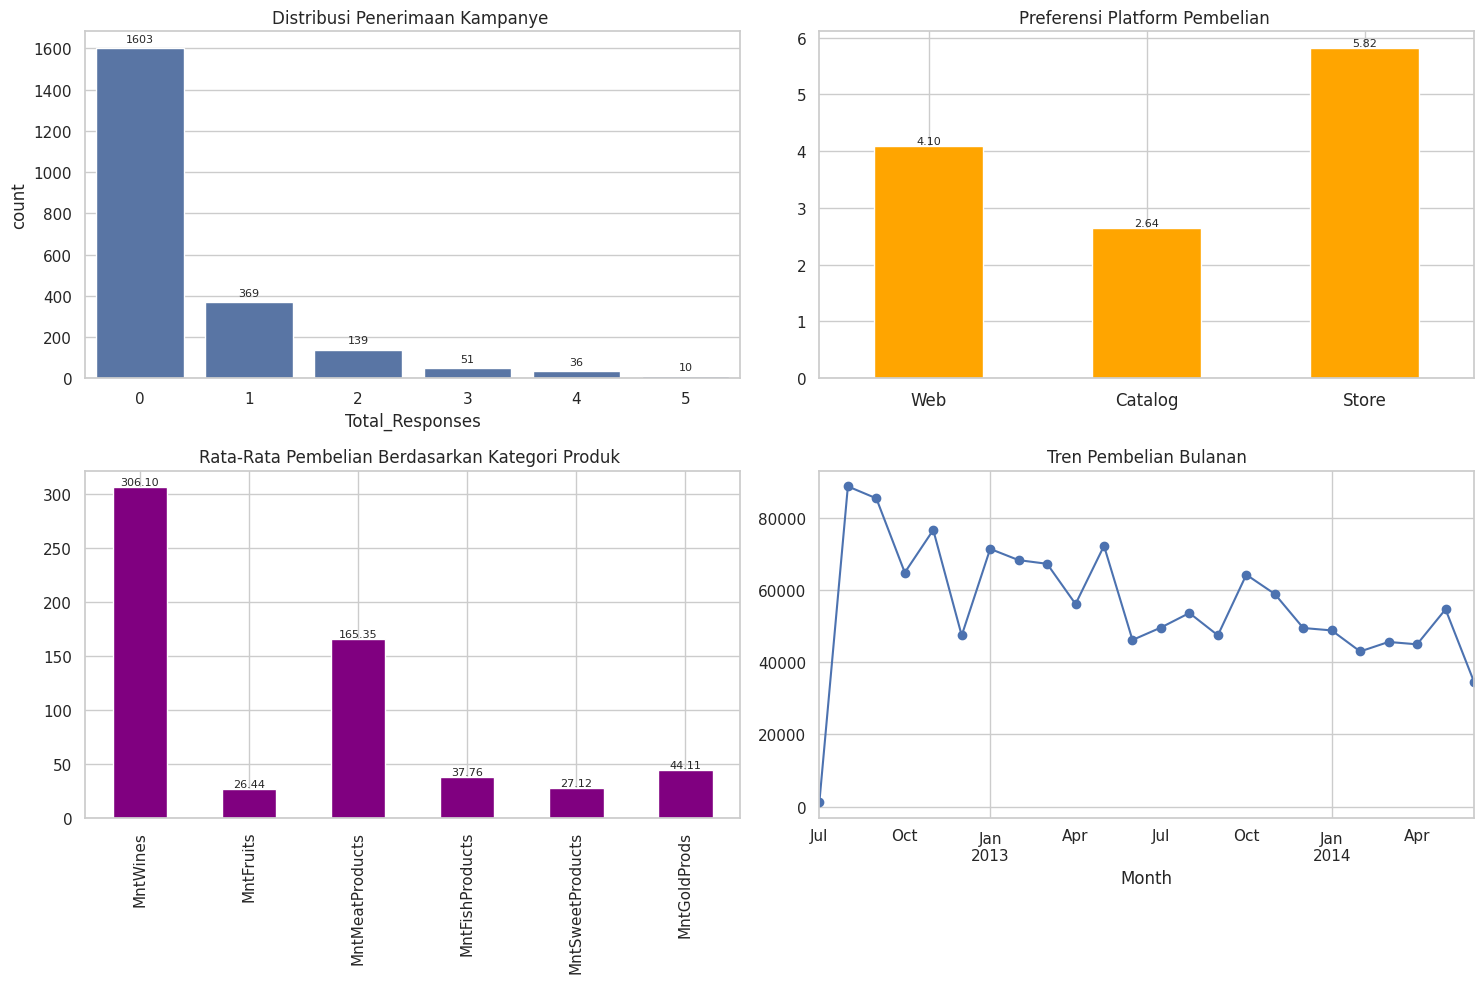

In [245]:
plt.figure(figsize=(15, 10))

# Distribusi penerimaan kampanye
plt.subplot(2, 2, 1)
ax = sns.countplot(data=df, x='Total_Responses')
plt.title('Distribusi Penerimaan Kampanye ')

# Menambahkan angka di atas setiap diagram batang
for i in ax.containers:
    ax.bar_label(i, fontsize=8, padding=3)

# Preferensi Platform Pembelian
plt.subplot(2, 2, 2)
channel_means = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()

ax = channel_means.plot(kind='bar', color='orange')
plt.title('Preferensi Platform Pembelian ')

plt.xticks(rotation=0, ha='center', fontsize=8)

ax.set_xticklabels(['Web', 'Catalog', 'Store'], ha='center', fontsize=12)

# Menambahkan angka di atas setiap diagram batang
for i, v in enumerate(channel_means):
    ax.text(i, v, f'{v:.2f}',
            ha='center',
            va='bottom',
            fontsize=8)

# Pembelian berdasarkan kategori produk
plt.subplot(2, 2, 3)
product_means = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

ax = product_means.plot(kind='bar', color='purple')
plt.title('Rata-Rata Pembelian Berdasarkan Kategori Produk ')

# Menambahkan angka di atas setiap diagram batang
for i, v in enumerate(product_means):
    ax.text(i, v, f'{v:.2f}',
            ha='center',
            va='bottom',
            fontsize=8)


# Tren pembelian bulanan
plt.subplot(2, 2, 4)
monthly_spending = df.groupby('Month')['Total_Spending'].sum()

ax = monthly_spending.plot(marker='o')
plt.title('Tren Pembelian Bulanan')

plt.tight_layout()
plt.show()

# Rising Insight

In [246]:
product_spend_by_education = df.groupby(['Education']).agg({
    'MntWines': 'mean',
    'MntFruits': 'mean',
    'MntMeatProducts': 'mean',
    'MntFishProducts': 'mean',
    'MntSweetProducts': 'mean',
    'MntGoldProds': 'mean'
}).reset_index()

print("Rata-Rata Pembelian Berdasarkan Tingkat Pendidikan:")
print(product_spend_by_education)

Rata-Rata Pembelian Berdasarkan Tingkat Pendidikan:
    Education    MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  Basic       7.240741    11.111111  11.444444        17.055556         
1  Graduation  285.804133  30.930818  179.312668       43.523810         
2  Master      286.645390  24.242908  153.320922       37.413121         
3  PhD         410.297694  20.272537  164.406709       27.058700         

   MntSweetProducts  MntGoldProds  
0  12.111111         22.833333     
1  31.367475         50.807727     
2  25.780142         42.618794     
3  20.503145         32.658281     


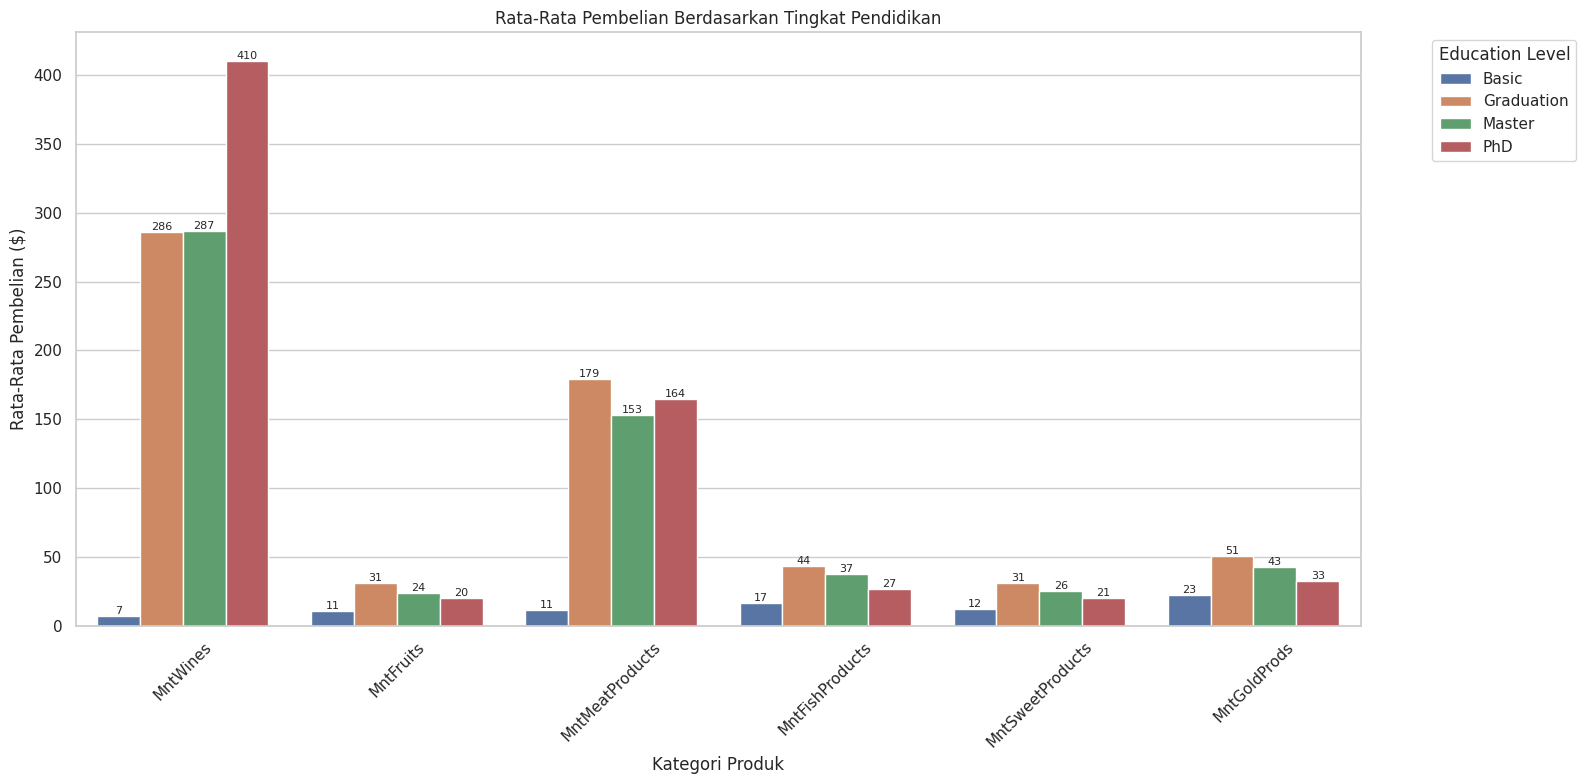

In [247]:
# Barchart Rata-Rata Pembelian Berdasarkan Tingkat Pendidikan
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

# Melt dataframe
melted_df = product_spend_by_education.melt(id_vars='Education',
                                               value_vars=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
                                               var_name='Product_Category',
                                               value_name='Average_Spend')


ax = sns.barplot(data=melted_df, x='Product_Category', y='Average_Spend', hue='Education')

# Menambah label dan judul
plt.title("Rata-Rata Pembelian Berdasarkan Tingkat Pendidikan")
plt.xlabel("Kategori Produk")
plt.ylabel("Rata-Rata Pembelian ($)")
plt.xticks(rotation=45)
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menambah angka di setiap batang
for i, container in enumerate(ax.containers):
    ax.bar_label(container, fmt='%.0f', label_type='edge', size=8)

plt.tight_layout()
plt.show()

In [248]:
product_spend_by_age = df.groupby(['Age_Category']).agg({
    'MntWines': 'mean',
    'MntFruits': 'mean',
    'MntMeatProducts': 'mean',
    'MntFishProducts': 'mean',
    'MntSweetProducts': 'mean',
    'MntGoldProds': 'mean'
}).reset_index()

print("Rata-Rata Pembelian Produk Berdasarkan Status Pernikahan:")
print(product_spend_by_age)

Rata-Rata Pembelian Produk Berdasarkan Status Pernikahan:
  Age_Category    MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  Category 1   241.661479  29.108949  190.081712       38.579767         
1  Category 2   251.379965  24.708117  141.573402       36.476684         
2  Category 3   298.715180  25.020344  151.779343       32.557121         
3  Category 4   378.357435  28.095498  187.283765       43.017735         

   MntSweetProducts  MntGoldProds  
0  29.568093         43.747082     
1  25.958549         39.132988     
2  24.992175         42.231612     
3  29.040928         49.809004     


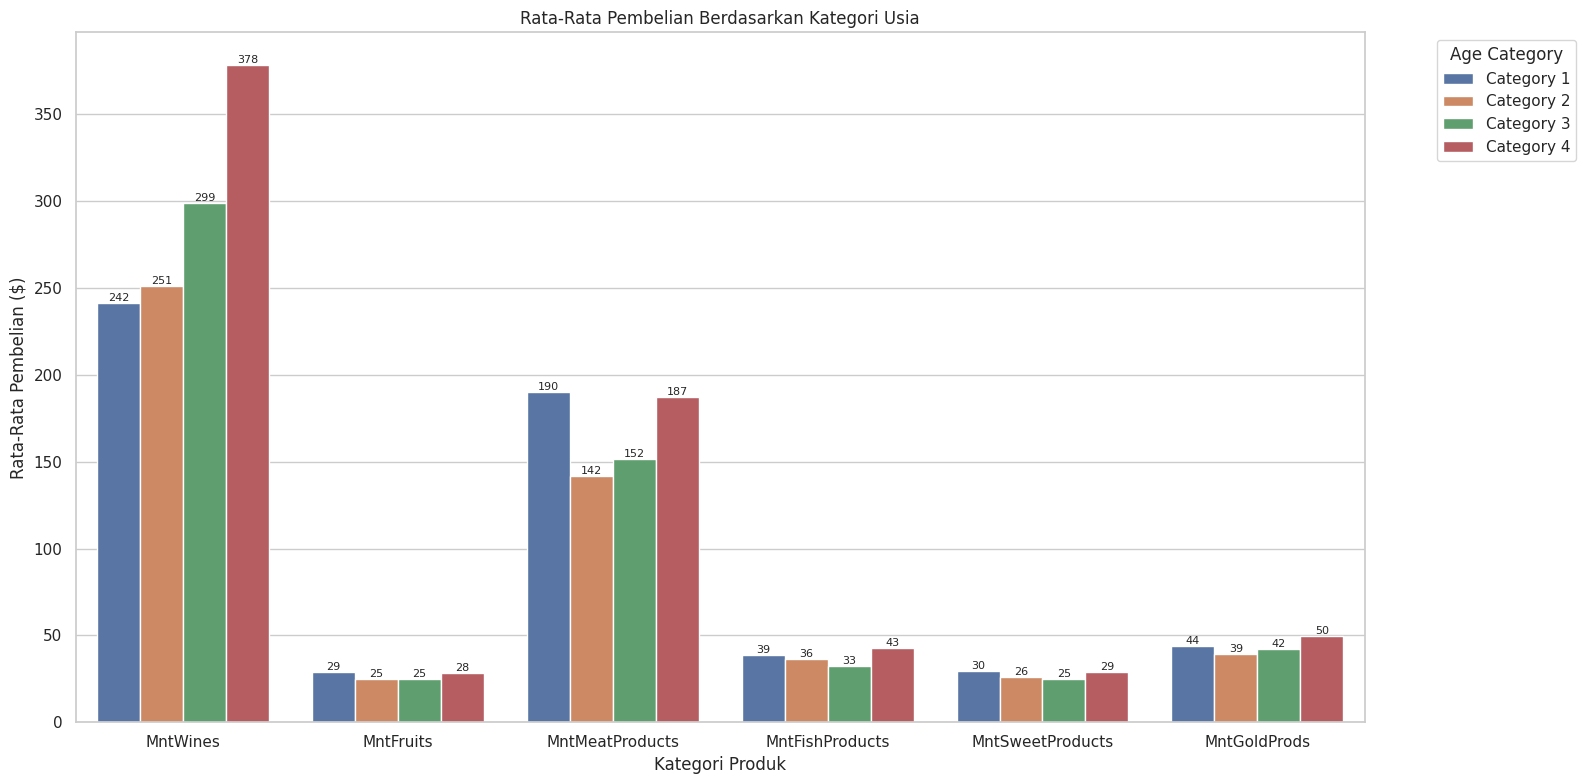

In [249]:
# Rata-Rata Pembelian Berdasarkan Kategori Usia
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

# Melt dataframe
melted_df = product_spend_by_age.melt(id_vars='Age_Category',
                                               value_vars=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
                                               var_name='Product_Category',
                                               value_name='Average_Spend')

ax = sns.barplot(data=melted_df, x='Product_Category', y='Average_Spend', hue='Age_Category')

# Menambah label dan judul
plt.title("Rata-Rata Pembelian Berdasarkan Kategori Usia")
plt.xlabel("Kategori Produk")
plt.ylabel("Rata-Rata Pembelian ($)")
plt.xticks(rotation=0)
plt.legend(title='Age Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menambah angka di setiap batang
for i, container in enumerate(ax.containers):
    ax.bar_label(container, fmt='%.0f', label_type='edge', size=8)

plt.tight_layout()
plt.show()

In [250]:
# Rata-Rata Pembelian Produk Berdasarkan Status Pernikahan
product_spend_by_demographics = df.groupby(['Marital_Status']).agg({
    'MntWines': 'mean',
    'MntFruits': 'mean',
    'MntMeatProducts': 'mean',
    'MntFishProducts': 'mean',
    'MntSweetProducts': 'mean',
    'MntGoldProds': 'mean'
}).reset_index()

print("Rata-Rata Pembelian Produk Berdasarkan Status Pernikahan:")
print(product_spend_by_demographics)

Rata-Rata Pembelian Produk Berdasarkan Status Pernikahan:
  Marital_Status    MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  Married        310.218777  26.482343  158.151593       36.432386         
1  Single         301.534862  26.382999  173.327603       39.229226         

   MntSweetProducts  MntGoldProds  
0  27.578811         44.527132     
1  26.616046         43.649475     


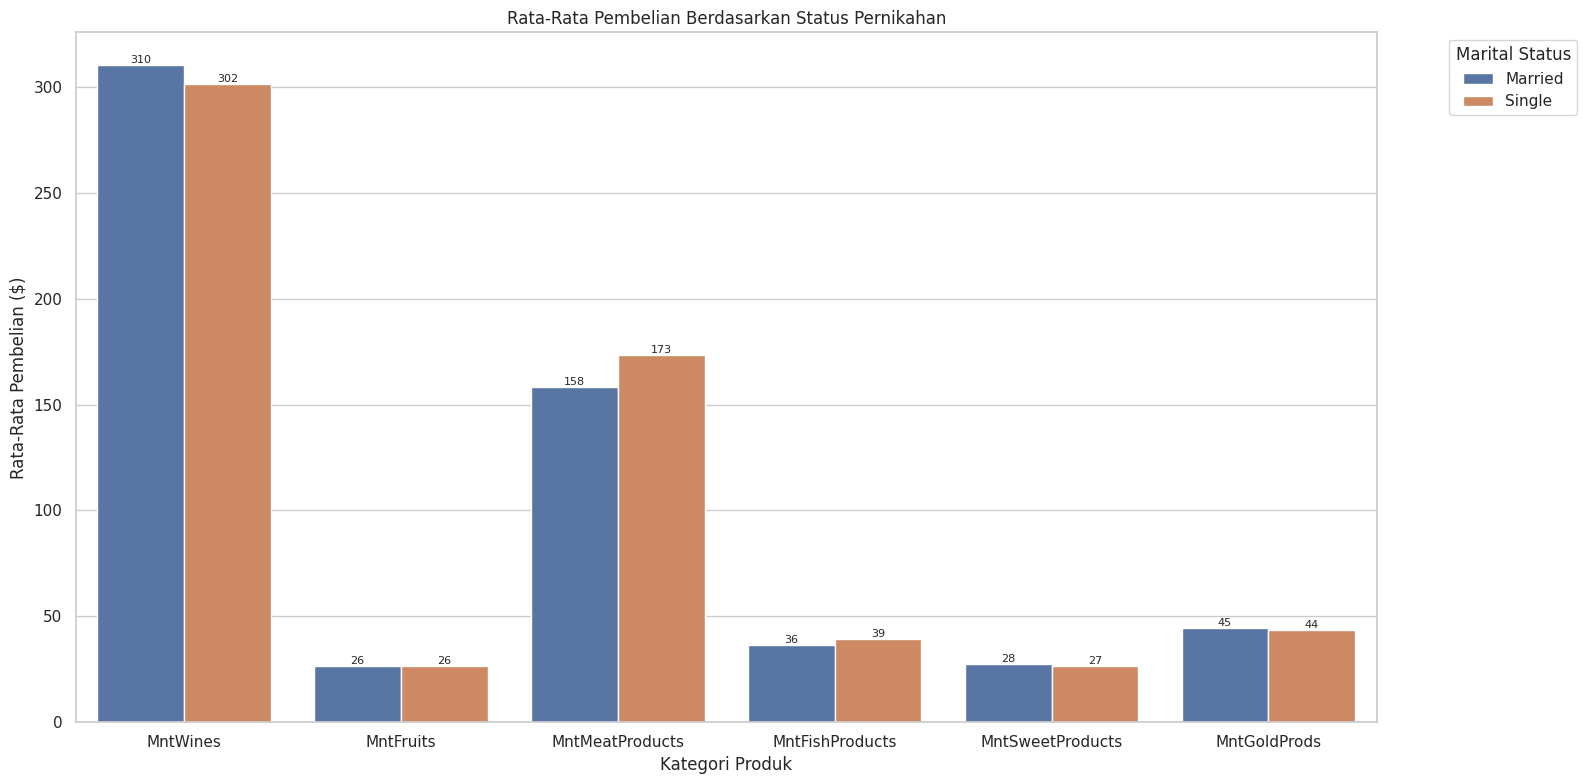

In [251]:
# Barchart Rata-Rata Pembelian Berdasarkan Status Pernikahan

plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

melted_df = product_spend_by_demographics.melt(id_vars='Marital_Status',
                                               value_vars=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
                                               var_name='Product_Category',
                                               value_name='Average_Spend')

ax = sns.barplot(data=melted_df, x='Product_Category', y='Average_Spend', hue='Marital_Status')

# Menambahkan label dan judul
plt.title("Rata-Rata Pembelian Berdasarkan Status Pernikahan")
plt.xlabel("Kategori Produk")
plt.ylabel("Rata-Rata Pembelian ($)")
plt.xticks(rotation=0)
plt.legend(title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menambah angka pada setiap batang
for i, container in enumerate(ax.containers):
    ax.bar_label(container, fmt='%.0f', label_type='edge', size=8)

plt.tight_layout()
plt.show()

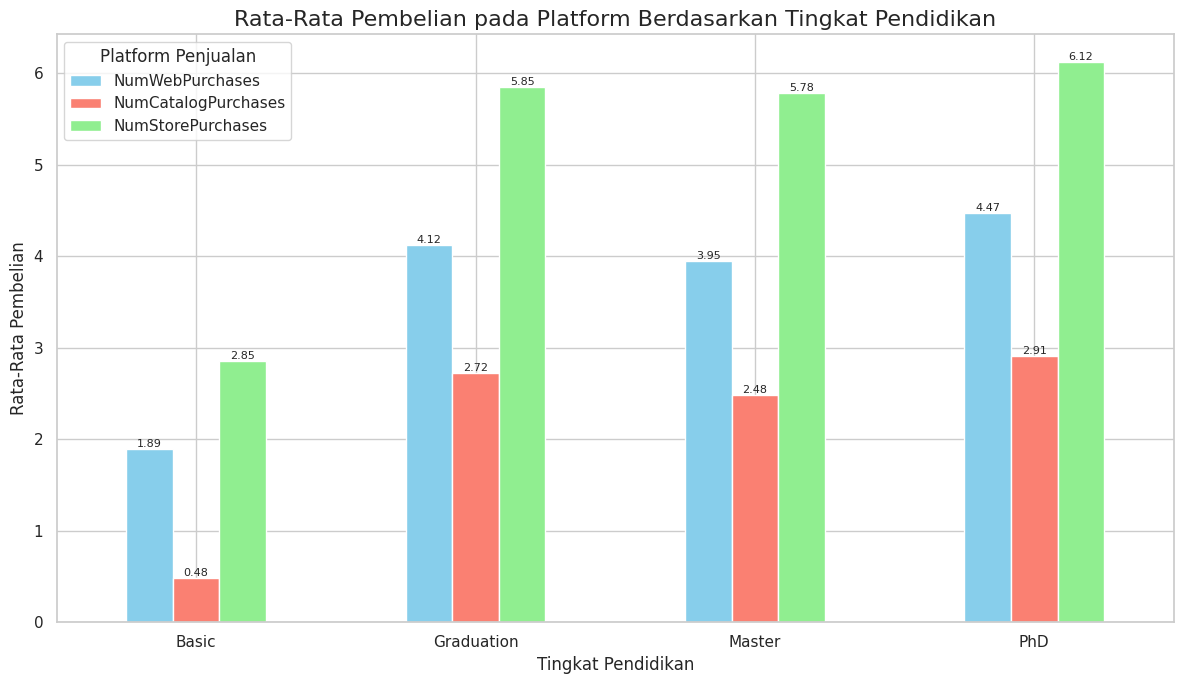

In [252]:
# Barchart Platform Pembelian Berdasarkan Tingkat Pendidikan
platform_usage_by_education = df.groupby('Education')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()

fig, ax = plt.subplots(figsize=(12, 7))
platform_usage_by_education.plot(kind='bar', ax=ax, color=['skyblue', 'salmon', 'lightgreen'])

# Menambah label dan judul
plt.title('Rata-Rata Pembelian pada Platform Berdasarkan Tingkat Pendidikan', fontsize=16)
plt.xlabel('Tingkat Pendidikan', fontsize=12)
plt.ylabel('Rata-Rata Pembelian', fontsize=12)
plt.legend(title='Platform Penjualan', title_fontsize=12)
plt.xticks(rotation=0)

# Menambah angka di setiap batang
for i, container in enumerate(ax.containers):
    ax.bar_label(container, fmt='%.2f', label_type='edge', size=8)

plt.tight_layout()
plt.show()

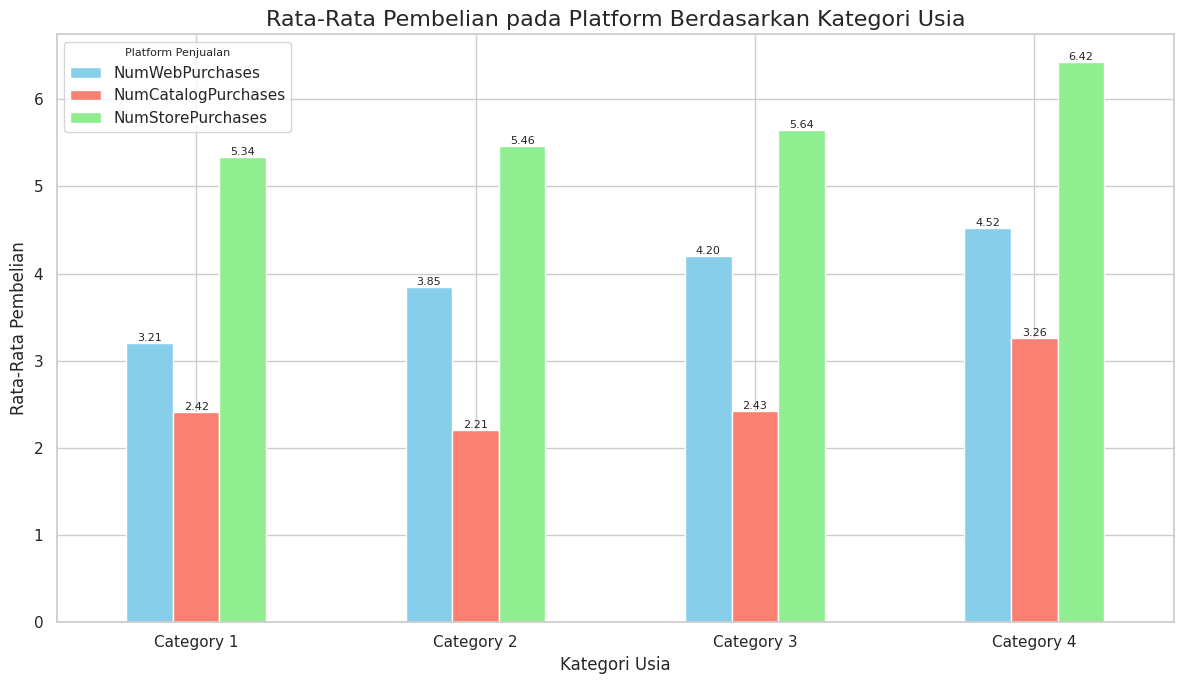

In [253]:
# Barchart Platform Pembelian Berdasarkan Kategori Usia
platform_usage_by_age = df.groupby('Age_Category')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()

fig, ax = plt.subplots(figsize=(12, 7))
platform_usage_by_age.plot(kind='bar', ax=ax, color=['skyblue', 'salmon', 'lightgreen'])

# Menambah label dan judul
plt.title('Rata-Rata Pembelian pada Platform Berdasarkan Kategori Usia', fontsize=16)
plt.xlabel('Kategori Usia', fontsize=12)
plt.ylabel('Rata-Rata Pembelian', fontsize=12)
plt.legend(title='Platform Penjualan', title_fontsize=8)
plt.xticks(rotation=0)

# Menambah angka di setiap batang
for i, container in enumerate(ax.containers):
    ax.bar_label(container, fmt='%.2f', label_type='edge', size=8)

plt.tight_layout()
plt.show()

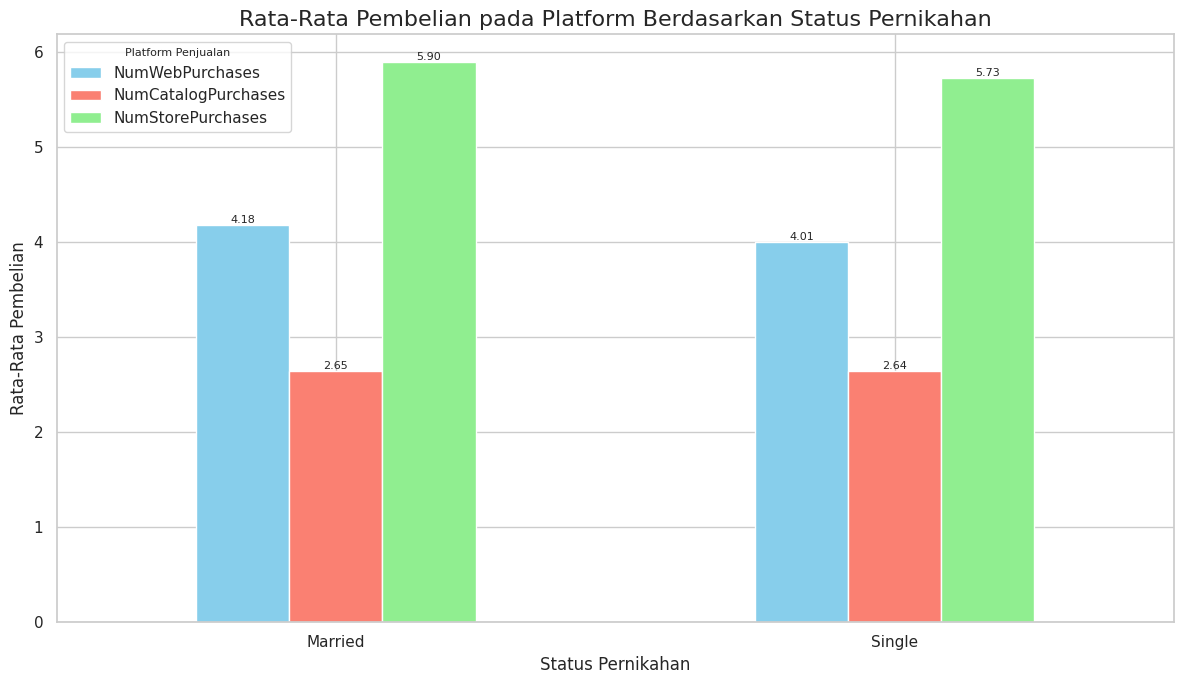

In [254]:
# Barchart Platform Pembelian Berdasarkan Status Pernikahan
platform_usage_by_marital = df.groupby('Marital_Status')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()

fig, ax = plt.subplots(figsize=(12, 7))
platform_usage_by_marital.plot(kind='bar', ax=ax, color=['skyblue', 'salmon', 'lightgreen'])

# Menambah label dan judul
plt.title('Rata-Rata Pembelian pada Platform Berdasarkan Status Pernikahan', fontsize=16)
plt.xlabel('Status Pernikahan', fontsize=12)
plt.ylabel('Rata-Rata Pembelian', fontsize=12)
plt.legend(title='Platform Penjualan', title_fontsize=8)
plt.xticks(rotation=0)

# Menambah angka di setiap batang
for i, container in enumerate(ax.containers):
    ax.bar_label(container, fmt='%.2f', label_type='edge', size=8)

plt.tight_layout()
plt.show()

# Statistika Inferensial

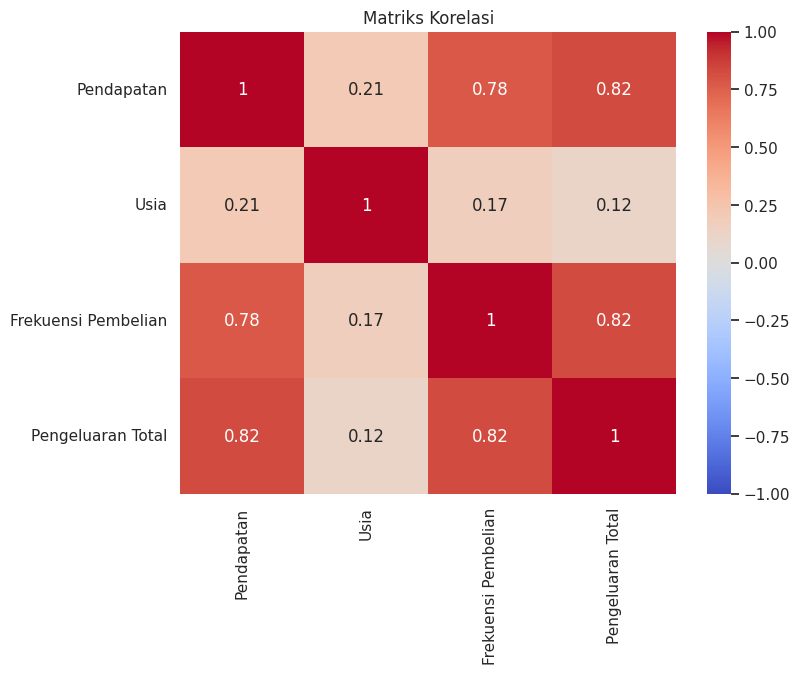

In [266]:
# Hitung korelasi antara variabel numerik
correlation_matrix = df[['Income', 'Age', 'Purchase_Frequency', 'Total_Spending']].corr()
correlation_matrix.columns = ['Pendapatan', 'Usia', 'Frekuensi Pembelian', 'Pengeluaran Total']
correlation_matrix.index = ['Pendapatan', 'Usia', 'Frekuensi Pembelian', 'Pengeluaran Total']

# Visualisasi korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriks Korelasi')
plt.show()


In [272]:
# Buat tabel kontingensi
contingency_table = pd.crosstab(df['Customer_Segment'], df['Education'])

# Uji Chi-Square
chi2, p, dof, expected = chi2_contingency(contingency_table)

print('Chi Square: ', chi2, '\nP-Value: ', p)
# Interpretasi hasil
if p < 0.05:
    print("Ada hubungan signifikan antara tingkat pendidikan dan segmentasi pelanggan.")
else:
    print("Tidak ada hubungan signifikan antara tingkat pendidikan dan segmentasi pelanggan.")

Chi Square:  18.78507137350505 
P-Value:  0.00030284810157762764
Ada hubungan signifikan antara tingkat pendidikan dan segmentasi pelanggan.


In [275]:
# Buat tabel kontingensi
contingency_table = pd.crosstab(df['Customer_Segment'], df['Age_Category'])

# Uji Chi-Square
chi2, p, dof, expected = chi2_contingency(contingency_table)

print('Chi Square: ', chi2, '\nP-Value: ', p)
# Interpretasi hasil
if p < 0.05:
    print("Ada hubungan signifikan antara kategori usia dan segmentasi pelanggan.")
else:
    print("Tidak ada hubungan signifikan antara kategori usia dan segmentasi pelanggan.")

Chi Square:  5.329680225288021 
P-Value:  0.14918803891092977
Tidak ada hubungan signifikan antara kategori usia dan segmentasi pelanggan.


In [274]:
# Buat tabel kontingensi
contingency_table = pd.crosstab(df['Customer_Segment'], df['Marital_Status'])

# Uji Chi-Square
chi2, p, dof, expected = chi2_contingency(contingency_table)

print('Chi Square: ', chi2, '\nP-Value: ', p)
# Interpretasi hasil
if p < 0.05:
    print("Ada hubungan signifikan antara status pernikahan dan segmentasi pelanggan.")
else:
    print("Tidak ada hubungan signifikan antara status pernikahan dan segmentasi pelanggan.")

Chi Square:  0.5417543662262427 
P-Value:  0.4617065683047059
Tidak ada hubungan signifikan antara status pernikahan dan segmentasi pelanggan.


In [255]:
df['Preferred_Platform'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].idxmax(axis=1)

# Membuat tabel kontingensi antara tingkat pendidikan dan platform belanja yang paling disukai
platform_education_contingency = pd.crosstab(df['Education'], df['Preferred_Platform'])

# Melakukan uji chi-square
chi2, p, dof, expected = chi2_contingency(platform_education_contingency)

# Menampilkan hasil
print("Tabel Kontingensi:")
print(platform_education_contingency)
print(f"\nNilai Chi-Square: {chi2}")
print(f"p-value: {p}")

# Interpretasi hasil
if p < 0.05:
    print("Ada hubungan signifikan antara tingkat pendidikan dan preferensi platform belanja.")
else:
    print("Tidak ada hubungan signifikan antara tingkat pendidikan dan preferensi platform belanja.")

Tabel Kontingensi:
Preferred_Platform  NumCatalogPurchases  NumStorePurchases  NumWebPurchases
Education                                                                  
Basic                0                   40                 14             
Graduation          88                   722                303            
Master              28                   388                148            
PhD                 40                   309                128            

Nilai Chi-Square: 11.3030366582517
p-value: 0.07945024795542045
Tidak ada hubungan signifikan antara tingkat pendidikan dan preferensi platform belanja.


In [256]:
df['Preferred_Platform'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].idxmax(axis=1)

# Membuat tabel kontingensi antara kategori usia dan platform belanja yang paling disukai
platform_age_contingency = pd.crosstab(df['Age_Category'], df['Preferred_Platform'])

# Melakukan uji chi-square
chi2, p, dof, expected = chi2_contingency(platform_education_contingency)

# Menampilkan hasil
print("Tabel Kontingensi:")
print(platform_age_contingency)
print(f"\nNilai Chi-Square: {chi2}")
print(f"p-value: {p}")

# Interpretasi hasil
if p < 0.05:
    print("Ada hubungan signifikan antara kategori usia dan preferensi platform belanja.")
else:
    print("Tidak ada hubungan signifikan antara kategori usia dan preferensi platform belanja.")

Tabel Kontingensi:
Preferred_Platform  NumCatalogPurchases  NumStorePurchases  NumWebPurchases
Age_Category                                                               
Category 1          19                   181                57             
Category 2          21                   403                155            
Category 3          40                   406                193            
Category 4          76                   469                188            

Nilai Chi-Square: 11.3030366582517
p-value: 0.07945024795542045
Tidak ada hubungan signifikan antara kategori usia dan preferensi platform belanja.


In [257]:
df['Preferred_Platform'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].idxmax(axis=1)

# Membuat tabel kontingensi antara status pernikahan dan platform belanja yang paling disukai
platform_marital_contingency = pd.crosstab(df['Marital_Status'], df['Preferred_Platform'])

# Melakukan uji chi-square
chi2, p, dof, expected = chi2_contingency(platform_education_contingency)

# Menampilkan hasil
print("Tabel Kontingensi:")
print(platform_marital_contingency)
print(f"\nNilai Chi-Square: {chi2}")
print(f"p-value: {p}")

# Interpretasi hasil
if p < 0.05:
    print("Ada hubungan signifikan antara status pernikahan dan preferensi platform belanja.")
else:
    print("Tidak ada hubungan signifikan antara status pernikahan dan preferensi platform belanja.")

Tabel Kontingensi:
Preferred_Platform  NumCatalogPurchases  NumStorePurchases  NumWebPurchases
Marital_Status                                                             
Married             76                   780                305            
Single              80                   679                288            

Nilai Chi-Square: 11.3030366582517
p-value: 0.07945024795542045
Tidak ada hubungan signifikan antara status pernikahan dan preferensi platform belanja.


# AHA Moment

In [258]:
# Menghitung nilai frekuensi
df['Purchase_Frequency'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Menghitung Customer Value Score
df['Customer_Value_Score'] = (df['Total_Spending'] / df['Total_Spending'].max() * 0.5 +
                              df['Purchase_Frequency'] / df['Purchase_Frequency'].max() * 0.3 +
                              (1 - (df['Recency'].max() - df['Recency']) / (df['Recency'].max() - df['Recency'].min())) * 0.2)

# Mengkategorikan customer berdasarkan Customer Value Score
high_value_threshold = df['Customer_Value_Score'].quantile(0.8)
df['Customer_Segment'] = np.where(df['Customer_Value_Score'] >= high_value_threshold, 'High-Value', 'Regular')


Segment Analysis:
                 Total_Spending         Purchase_Frequency        Recency  \
                           mean  median               mean median    mean   
Customer_Segment                                                            
High-Value        1509.04        1499.0  21.06              21.0   61.84    
Regular           381.08         198.0   10.44              9.0    45.80    

                        Customer_Value_Score        
                 median                count  mean  
Customer_Segment                                    
High-Value        64.5   442                  0.62  
Regular           46.0   1766                 0.27  

Preferensi Platform Berdasarkan Segmen:
                  NumWebPurchases  NumCatalogPurchases  NumStorePurchases
Customer_Segment                                                         
High-Value        5.94             6.10                 9.02             
Regular           3.64             1.78                 5.02       

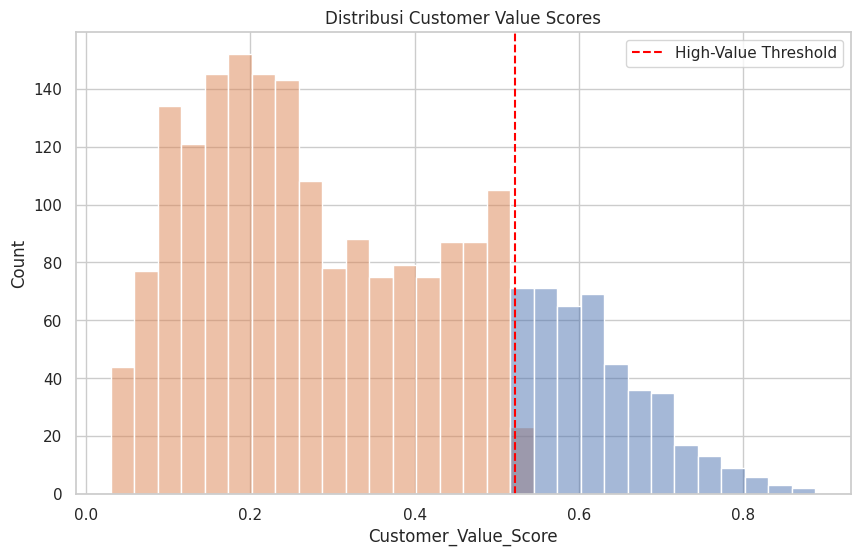

In [259]:
# Analisis
segment_analysis = df.groupby('Customer_Segment').agg({
    'Total_Spending': ['mean', 'median'],
    'Purchase_Frequency': ['mean', 'median'],
    'Recency': ['mean', 'median'],
    'Customer_Value_Score': ['count', 'mean']
}).round(2)

print("\nSegment Analysis:")
print(segment_analysis)

# Analisis preferensi platform
channel_analysis = df.groupby('Customer_Segment').agg({
    'NumWebPurchases': 'mean',
    'NumCatalogPurchases': 'mean',
    'NumStorePurchases': 'mean'
}).round(2)

print("\nPreferensi Platform Berdasarkan Segmen:")
print(channel_analysis)


# Visualisasi Distribusi Customer Value Score
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Customer_Value_Score', hue='Customer_Segment', bins=30)
plt.axvline(high_value_threshold, color='red', linestyle='--', label='High-Value Threshold')
plt.title('Distribusi Customer Value Scores')
plt.legend()
plt.show()

# Solusi dan Langkah yang Harus Diambil Kedepannya


# Daftar Pustaka